In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

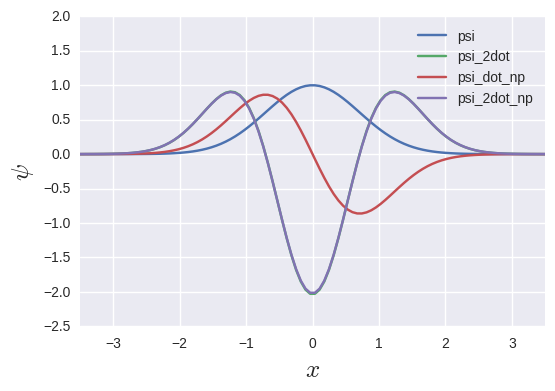

In [18]:
def f(x):
    return np.exp(-x**2)

L, N = 7, 100
x = np.linspace(-L/2, L/2, N)
psi = f(x)

K = np.eye(N, N)
K_sub = np.vstack((K[1:], np.array([0] * N)))
K = -2 * K + K_sub + K_sub.T

dx = L/N
psi_2dot = dx**-2 * np.dot(K, psi)

psi_dot_np = np.gradient(psi, dx)
psi_2dot_np = np.gradient(psi_dot_np, dx)

plt.plot(x, psi, label="psi")
plt.plot(x, psi_2dot, label="psi_2dot")
plt.plot(x, psi_dot_np, label="psi_dot_np")
plt.plot(x, psi_2dot_np, label="psi_2dot_np")
plt.xlim(-3.5, 3.5)
plt.ylim(-2.5, 2)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\psi$', fontsize=18)

plt.legend()
plt.show()

In [19]:
from scipy.integrate import quad, simps
print(simps(psi, x))
print(quad(f, -np.inf, np.inf))

1.77245254164
(1.7724538509055159, 1.4202636780944923e-08)


In [20]:
simp_arr = f(x) + 4 * f(x + dx / 2) + f(x + dx)
print(dx / 6 * np.sum(simp_arr))

1.75472827313


In [21]:
L, N = 10, 200
x, dx = np.linspace(-L/2, L/2, N), L / N
K = np.eye(N, N)
K_sub = np.vstack((K[1:], np.array([0] * N)))
K = dx**-2 * (2 * K - K_sub - K_sub.T)

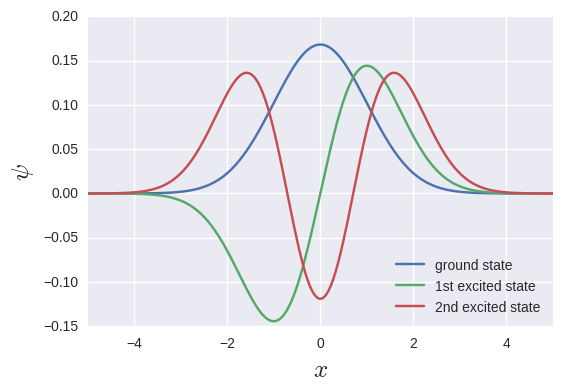

[ 1.00470938  1.00439356  1.00407832  1.00376982  1.00351013  1.00351647
  1.00464172  1.00938694  1.02300462  1.05279364  1.10422331  1.17688369
  1.26494763  1.36132769  1.46086643  1.56082387  1.66005567  1.75820017
  1.85521207  1.95115074]


In [22]:
V = np.diag(np.linspace(-L/2, L/2, N)**2)
H = (K + V) / 2
w, v = np.linalg.eigh(H)
plt.plot(x, v.T[0], label="ground state")
plt.plot(x, v.T[1], label="1st excited state")
plt.plot(x, v.T[2], label="2nd excited state")
plt.xlim(-L/2, L/2)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\psi$', fontsize=18)
plt.legend(loc="lower right")
plt.show()

print(np.diff(w)[:20])

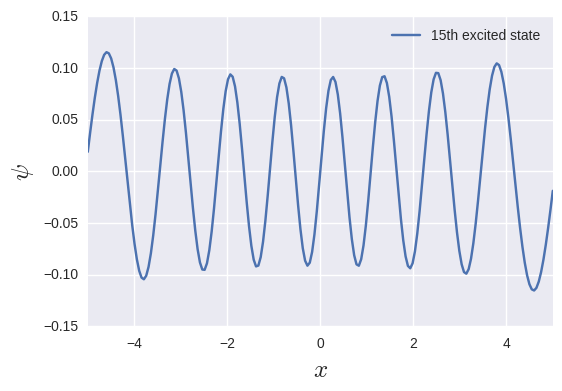

In [23]:
plt.plot(x, v.T[15], label="15th excited state")
plt.xlim(-L/2, L/2)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\psi$', fontsize=18)
plt.legend()
plt.show()

In [24]:
from scipy.integrate import odeint

def equation(f, t, N, L):
    dx = L / N
    gamma = dx**-2
    i = np.arange(1, N, 1)
    
    """ f0 """
    arr = np.array(gamma*(f[1]-2*f[0]))
    """ f1 ~ fN-1 """
    arr = np.append(arr, gamma*(f[i+1]-2*f[i]+f[i-1]))
    """ fN """
    arr = np.append(arr, gamma*(-2*f[N]+f[N-1]))

    return arr

def f(x):
    return np.exp(-x**2)

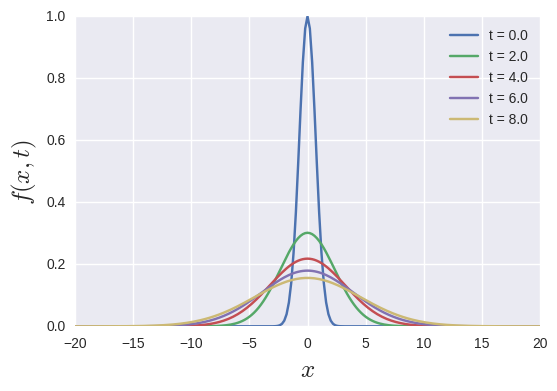

In [25]:
# initial parameter(optional)   
N, L = 200, 40.0
                                
# coordinate                    
x_div = N+1                     
q = np.linspace(-L/2, L/2, x_div)
                                
# initial value for each fk     
fk_0 = f(q)              
                                
# time                          
t_max, t_div = 10, 5         
t = np.linspace(0, t_max, t_div)

args = (N, L)
trajectories = odeint(equation, fk_0, t, args)

for i in range(t_div):                      
    l = "t = " + str(t_max*float(i)/t_div)  
    plt.plot(q, trajectories[i], label=l)   
                                            
plt.xlim(-L/2, L/2)                         
plt.ylim(0, 1)                            
plt.xlabel(r'$x$', fontsize=18)                             
plt.ylabel(r"$f(x,t)$", fontsize=18)
plt.legend()                                
plt.show()                                  

In [26]:
import sympy as sp
a = sp.Rational(1, 2)
print(a*2)

1


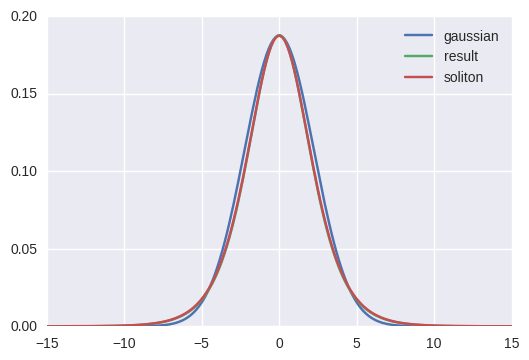

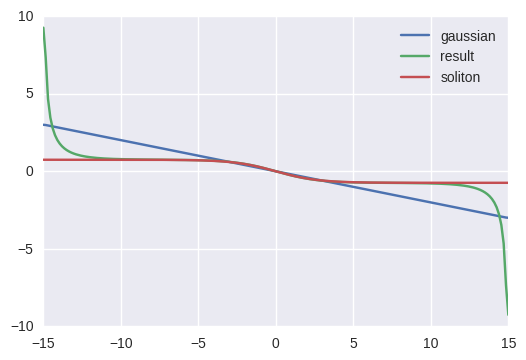

In [27]:
L, N, g = 30, 200, -5
x, dx = np.linspace(-L/2, L/2, N), L / N
K = np.eye(N, N)
K_sub = np.vstack((K[1:], np.array([0] * N)))
K = (dx**-2 * (2 * K - K_sub - K_sub.T)) * 0.5
psi = f(x)
V = g * np.diag(psi)**2
H = K + V 
w, v = np.linalg.eigh(H)
#plt.plot(w)
#plt.plot(x, psi**2)
#plt.plot(x, v.T[0]**2/dx)
#plt.show()
for i in range(1000):
    V = g * np.diag(np.abs(v.T[0])**2)
    H = K + V
    w, v = np.linalg.eigh(H)
  
#plt.plot(w)
a, b = 1.25, 0.37
gaussian = np.exp(-x**2*0.1)*dx*1.25
result = v.T[0]**2/dx
soliton = a*np.cosh(b*x)**-2*dx
plt.plot(x, gaussian, label="gaussian")
plt.plot(x, result, label="result")
plt.plot(x, soliton, label="soliton")
plt.legend()
plt.show()
plt.plot(x, np.gradient(np.log(gaussian), dx), label="gaussian")
plt.plot(x, np.gradient(np.log(result), dx), label="result")
plt.plot(x, np.gradient(np.log(soliton), dx), label="soliton")
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.show()
#plt.plot(x, np.exp(-x**2))
#plt.plot(x, np.exp(-x**2*0.2))
plt.show()


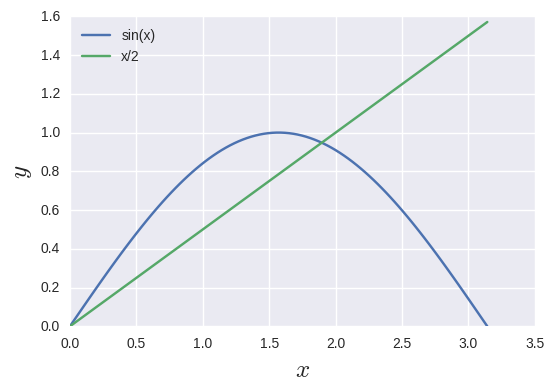

In [28]:
def f(x):
    return np.sin(x) - 0.5*x

x = np.linspace(0, np.pi, 100)
eq = f(x)
plt.plot(x, np.sin(x), label="sin(x)")
plt.plot(x, 0.5*x, label="x/2")
plt.legend(loc="upper left")
plt.xlabel(r"$x$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18)
plt.show()

In [29]:
from scipy.optimize import bisect

print(bisect(f, 1.5, 2))

1.8954942670334276


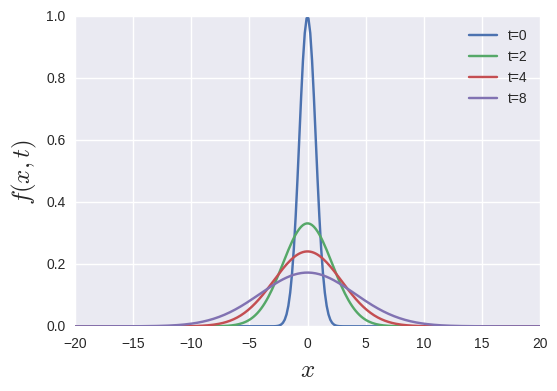

In [30]:
from scipy.fftpack import fft, ifft, fftfreq

def f(x):
    return np.exp(-x**2)

# set system
N, L = 256, 40.0
x = np.linspace(-L/2, L/2, N)

# set initial function
gaussian = f(x)
plt.plot(x, gaussian, label="t=0")

# set k_i
k = 2 * np.pi * fftfreq(N, d=1/N)/L
time = np.array([2, 4, 8])

for i, t in enumerate(time):
    expK = np.exp(-k**2 * t)
    result = ifft(fft(gaussian) * expK)
    plt.plot(x, np.abs(result), label="t={0}".format(t))


plt.xlim(-L/2, L/2)                         
plt.ylim(0, 1)                            
plt.xlabel(r'$x$', fontsize=18)                             
plt.ylabel(r"$f(x,t)$", fontsize=18)
plt.legend()                                
plt.show()  

16


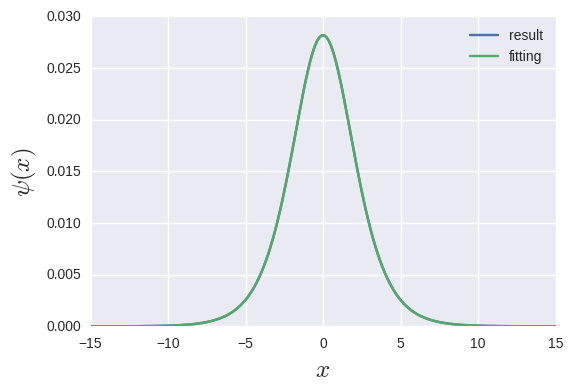

In [50]:
from scipy.optimize import curve_fit

def bright_soliton(x, a, b):
    return (b / np.cosh(a * x))**2

def h(x):
    return x * np.exp(-x**2)

# set system
L, N, g = 30, 200, -5
x, dx = np.linspace(-L/2, L/2, N), L / N

# set K matrix
K = np.eye(N, N)
K_sub = np.vstack((K[1:], np.array([0] * N)))
K = (dx**-2 * (2 * K - K_sub - K_sub.T)) * 0.5

# set initial function
v, w, mu = np.array([h(x)]).reshape(N, 1), np.array([3]), 0

i = 0 
#while np.all(abs(psi - v.T[np.argmin(w)]) > 1e-30):
while abs(w[np.argmin(w)] - mu) > 1e-5:

    # update mu
    mu = w[np.argmin(w)]
    
    # make G matrix
    G = g * np.diag(np.abs(v.T[np.argmin(w)])**2)
    
    # solve
    T = K + G
    w, v = np.linalg.eigh(T)
    i += 1
print(i)
a, b = 1, 1
# print(i, w[:7])
result = v.T[0]**2
plt.plot(x, result, label="result")

param = curve_fit(bright_soliton, x, result)[0]

plt.plot(x, bright_soliton(x, param[0], param[1]), label="fitting")
plt.xlabel(r'$x$', fontsize=18)                             
plt.ylabel(r"$\psi(x)$", fontsize=18)

plt.legend()
plt.show()
    